In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [66]:
print('Pandas version:',pd.__version__)
print('Numpy version:',np.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Statsmodels version:',statsmodels.__version__)

Pandas version: 1.2.4
Numpy version: 1.22.3
Seaborn version: 0.11.2
Matplotlib version: 3.5.1
Statsmodels version: 0.13.2


In [67]:
import os

In [68]:
df=pd.read_csv('Normalized+Age.csv')

In [69]:
df.head()

,Year,Age
0,1950,2.382149
1,1951,-0.586540
2,1952,0.421541
3,1953,0.092043
4,1954,-1.823828


In [70]:
df.min()

Year    1950.000000
Age       -2.209181
dtype: float64

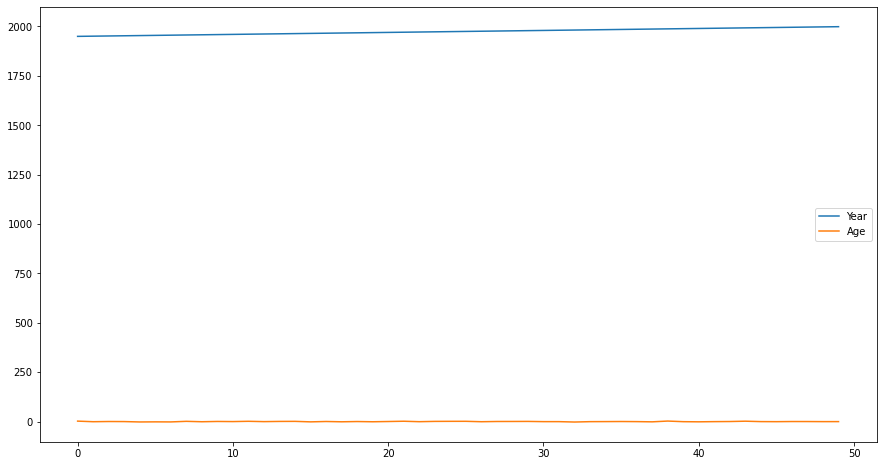

In [71]:
df.plot()
plt.show()

In [72]:
df.max()

Year    1999.000000
Age        2.707711
dtype: float64

In [74]:
date = pd.date_range(start='1/1/1950', end='1/1/1999', freq='Q')
date

DatetimeIndex(['1950-03-31', '1950-06-30', '1950-09-30', '1950-12-31',
               '1951-03-31', '1951-06-30', '1951-09-30', '1951-12-31',
               '1952-03-31', '1952-06-30',
               ...
               '1996-09-30', '1996-12-31', '1997-03-31', '1997-06-30',
               '1997-09-30', '1997-12-31', '1998-03-31', '1998-06-30',
               '1998-09-30', '1998-12-31'],
              dtype='datetime64[ns]', length=196, freq='Q-DEC')

In [75]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,Year,Age,Time_Stamp
0,1950,2.382149,1950-03-31
1,1951,-0.586540,1950-06-30
2,1952,0.421541,1950-09-30
3,1953,0.092043,1950-12-31
4,1954,-1.823828,1951-03-31


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        50 non-null     int64         
 1   Age         50 non-null     float64       
 2   Time_Stamp  50 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 KB


In [77]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,Year,Age
Time_Stamp,,
1950-03-31,1950,2.382149
1950-06-30,1951,-0.586540
1950-09-30,1952,0.421541
1950-12-31,1953,0.092043
1951-03-31,1954,-1.823828


In [78]:
df.drop(labels=['Year'],axis=1,inplace=True)
df.head()

,Age
Time_Stamp,
1950-03-31,2.382149
1950-06-30,-0.586540
1950-09-30,0.421541
1950-12-31,0.092043
1951-03-31,-1.823828


In [79]:
from pylab import rcParams

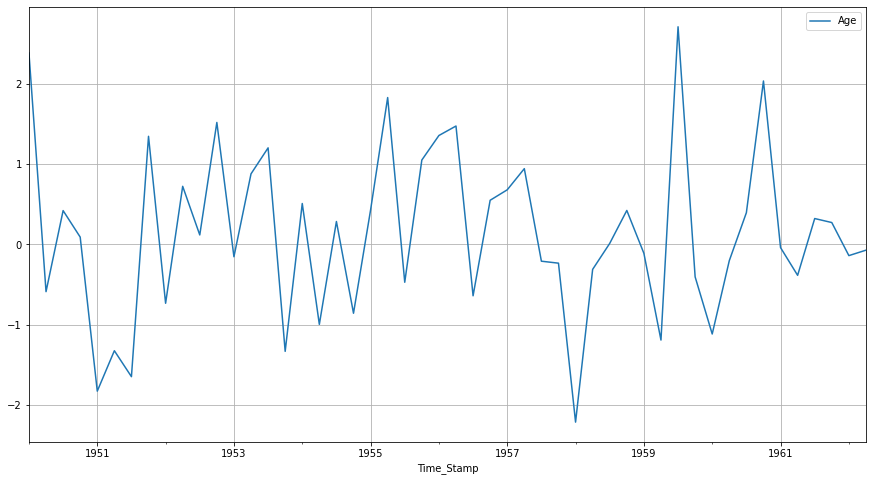

In [81]:
df.plot()
plt.grid();

In [82]:
df.describe()

,Age
count,50.000000
mean,0.136194
std,1.062493
min,-2.209181
25%,-0.452891
50%,0.052926
75%,0.712733
max,2.707711


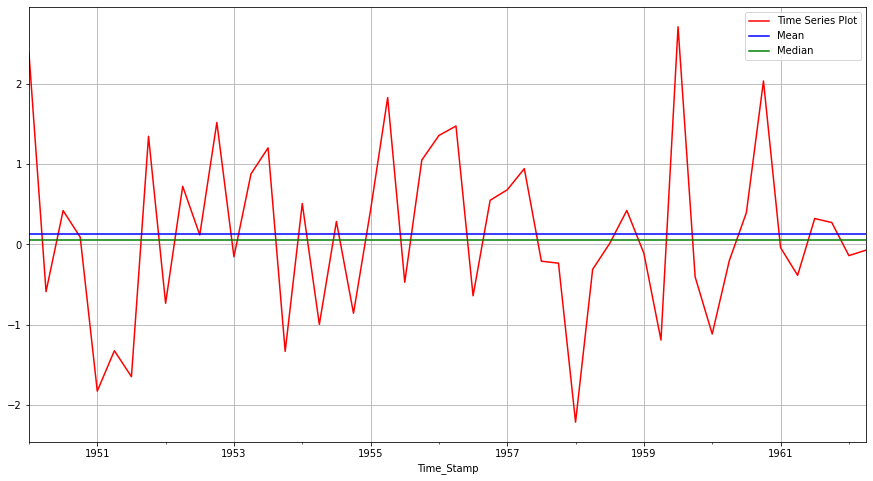

In [83]:
df.plot(color='Red')
plt.axhline(df['Age'].mean(),color='Blue')
plt.axhline(df['Age'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


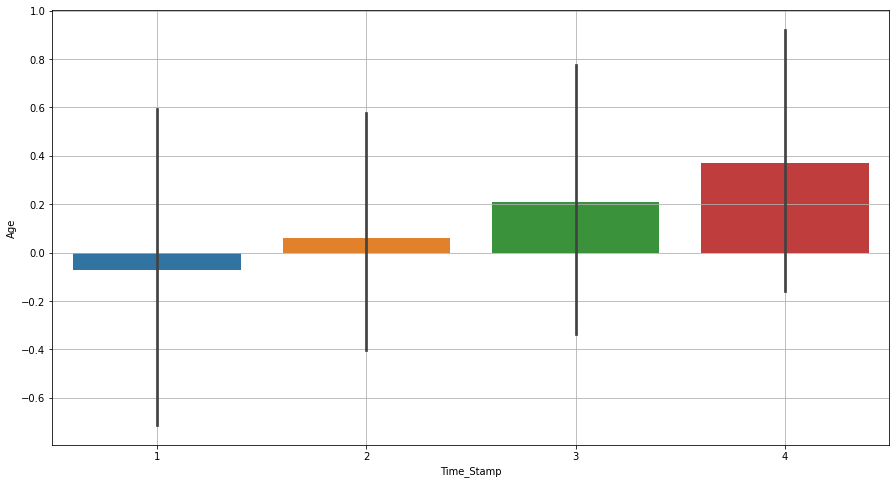

In [84]:
sns.barplot(df.index.quarter,df.Age,data=df)
plt.grid();

In [85]:
df.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1950-03-31', '1950-06-30', '1950-09-30', '1950-12-31',
               '1951-03-31', '1951-06-30', '1951-09-30', '1951-12-31',
               '1952-03-31', '1952-06-30', '1952-09-30', '1952-12-31',
               '1953-03-31', '1953-06-30', '1953-09-30', '1953-12-31',
               '1954-03-31', '1954-06-30', '1954-09-30', '1954-12-31',
               '1955-03-31', '1955-06-30', '1955-09-30', '1955-12-31',
               '1956-03-31', '1956-06-30', '1956-09-30', '1956-12-31',
               '1957-03-31', '1957-06-30', '1957-09-30', '1957-12-31',
               '1958-03-31', '1958-06-30', '1958-09-30', '1958-12-31',
               '1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30', '1961-09-30', '1961-12-31',
               '1962-03-31', '1962-06-30'],
              dtype='datetime64[ns]', name='Time_Stam

In [86]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Age', columns = df.index.month_name(), index = df.index.year)
quarterly_sales_across_years

Time_Stamp,December,June,March,September
Time_Stamp,,,,
1950,0.092043,-0.586540,2.382149,0.421541
1951,1.345475,-1.321100,-1.823828,-1.643775
1952,1.517928,0.723596,-0.730970,0.118890
1953,-1.329013,0.878540,-0.152322,1.201965
1954,-0.855039,-0.993296,0.509806,0.286018
1955,1.050416,1.827470,0.429329,-0.469615
1956,0.550127,1.473452,1.355565,-0.637938
1957,-0.232217,0.943176,0.680143,-0.207764
1958,0.423381,-0.309448,-2.209181,0.013808


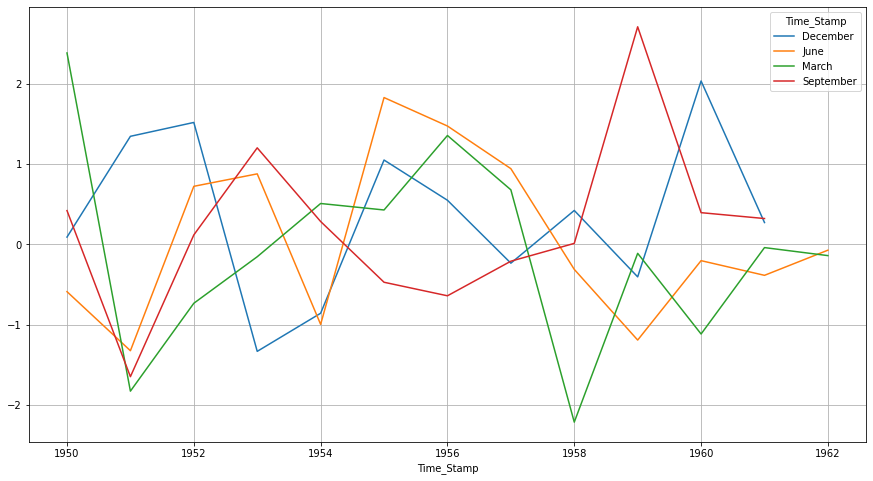

In [87]:
quarterly_sales_across_years.plot()
plt.grid()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

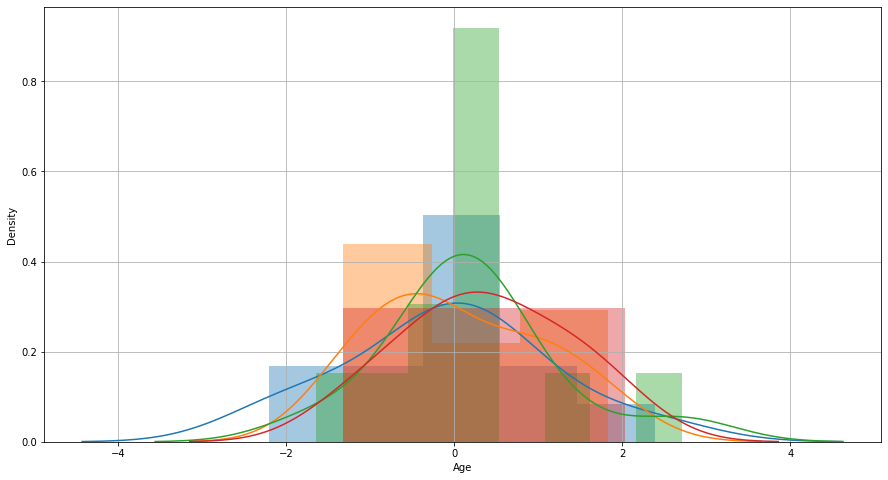

In [88]:
sns.distplot(df.loc[df.index.quarter == 1]['Age'])
sns.distplot(df.loc[df.index.quarter == 2]['Age'])
sns.distplot(df.loc[df.index.quarter == 3]['Age'])
sns.distplot(df.loc[df.index.quarter == 4]['Age'])
plt.grid();

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for ker

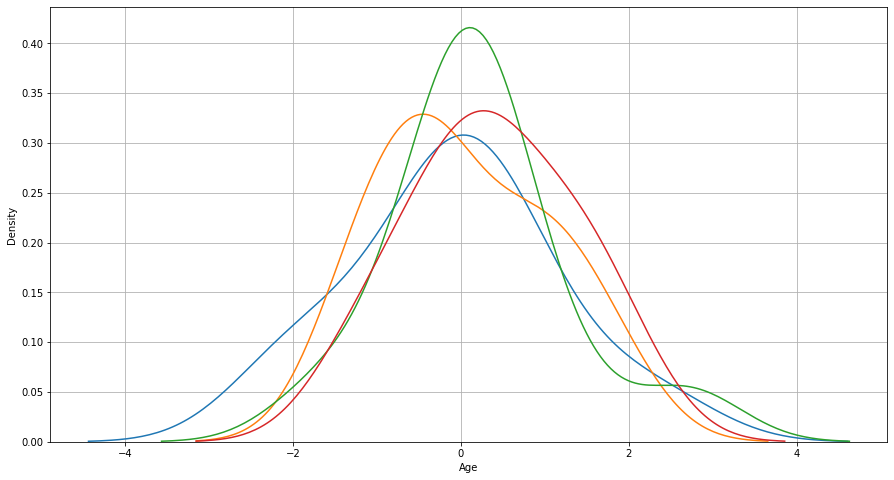

In [89]:
sns.distplot(df.loc[df.index.quarter == 1]['Age'],hist=False)
sns.distplot(df.loc[df.index.quarter == 2]['Age'],hist=False)
sns.distplot(df.loc[df.index.quarter == 3]['Age'],hist=False)
sns.distplot(df.loc[df.index.quarter == 4]['Age'],hist=False)
plt.grid();

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [91]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

ValueError: Multiplicative seasonality is not appropriate for zero and negative values